`Туториал В. И. Фирсановой специально для курса "Основы программирования на Python" НИУ ВШЭ в Санкт-Петербурге`

[Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

# Начало работы

Импорт модуля `import pandas as pd`

---

Почему `pd`?

По договоренности!

Это не влияет на работу модуля, но принято загружать библиотеку именно так, но именно с таким сокращением `pd` вы встретитесь в любой части официальной документации Pandas.

In [1]:
import pandas as pd

# Структуры данных Pandas

## DataFrame

Что такое `DataFrame`?

`DataFrame` - это двухмерная структура для хранения данных

Почему двухмерная? - У нее 2 измерения: строки и столбцы (таблица!)

Какие типы данных можно в нее записать? Str, Int, Float, etc...

In [2]:
# создать DataFrame вручную можно с помощью pd.DataFrame()
# в скобки поместите словарь:
# ключи словаря - названия столбцов
# значения словаря - списки, которые вы хотите записать в соответсвующие столбцы

# в этом примере мы создаем DataFrame с тремя столбцами - Name, Age, Sex
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

# отобразим результат
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


Задание: создать DataFrame следующего вида

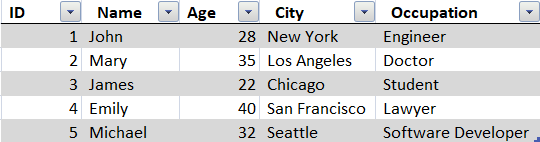

In [6]:
test_df = pd.DataFrame(
    {
    'Name':[
        'John',
        'Mary',
        'James',
        'Emily',
        'Michael' ],
    'Age': [28, 35, 22, 40, 32],
    'City': ['New York',
             'Los Angeles',
             'Chicago',
             'San Francisco',
             'Seattle'],
    'Occupation': ['Engineer',
                   'Doctor',
                   'Student',
                   'Lawyer',
                   'Software Developer'],
    }
    )

test_df

,Name,Age,City,Occupation
0,John,28,New York,Engineer
1,Mary,35,Los Angeles,Doctor
2,James,22,Chicago,Student
3,Emily,40,San Francisco,Lawyer
4,Michael,32,Seattle,Software Developer


In [ ]:
"""
Образец результата
"""

,Name,Age,City,Occupation
0,John,28,New York,Engineer
1,Mary,35,Los Angeles,Doctor
2,James,22,Chicago,Student
3,Emily,40,San Francisco,Lawyer
4,Michael,32,Seattle,Software Developer


## Series

`Series` - это столбец объекта `DataFrame`

In [ ]:
# получить доступ к Series (столбцу) можно, поместив название столбца в квадратные скобки,
# как будто это питоновский словарь, а мы хотим получить информацию по ключу
df['Age']

0    22
1    35
2    58
Name: Age, dtype: int64

Задание: выведите на экран `Series` по ключу `Occupation`

In [7]:
test_df['Occupation']

0              Engineer
1                Doctor
2               Student
3                Lawyer
4    Software Developer
Name: Occupation, dtype: object

In [ ]:
"""
Образец результата
"""

0              Engineer
1                Doctor
2               Student
3                Lawyer
4    Software Developer
Name: Occupation, dtype: object

У объекта `Series` нет подписей столбцов, но строки имеют свои идентификаторы.

Создадим объект `Series` с помощью `pd.Series`. В скобках нужно указать данные, которые мы хотим записать и имя нашего объекта.

In [ ]:
ages = pd.Series([22, 35, 58], name="Age")
ages

0    22
1    35
2    58
Name: Age, dtype: int64

Задание: создать `Series` под названием `Surnames` со следующей информацией:

```
1. Smith
2. Johnson
3. Davis
4. Taylor
5. Brown
```

In [9]:
surnames = pd.Series(['Smith', 'Johnson', 'Davis', 'Taylor', 'Brown'], name='Surnames')
surnames

0      Smith
1    Johnson
2      Davis
3     Taylor
4      Brown
Name: Surnames, dtype: object

In [ ]:
"""
Образец результата
"""

0      Smith
1    Johnson
2      Davis
3     Taylor
4      Brown
Name: Surnames, dtype: object

Конкатенируем наши объекты

In [11]:
df = pd.concat([test_df, surnames], axis=1)
df

,Name,Age,City,Occupation,Surnames
0,John,28,New York,Engineer,Smith
1,Mary,35,Los Angeles,Doctor,Johnson
2,James,22,Chicago,Student,Davis
3,Emily,40,San Francisco,Lawyer,Taylor
4,Michael,32,Seattle,Software Developer,Brown


Что дальше?

К нашим объектам можно применять любые функции. Для этого после точки пропишите метод и передайте аргументы (если они требуются). Как в задачах по теме ООП!

In [ ]:
# например, функция describe описывает все числовые данные в вашем DataFrame
df.describe()

,Age
count,5.000000
mean,31.400000
std,6.841053
min,22.000000
25%,28.000000
50%,32.000000
75%,35.000000
max,40.000000


# Чтение данных

Обычно мы храним данные в формате `csv` (comma-separated values)

Для чтения таких файлов есть функция `read_csv`

In [12]:
# загрузим датасет про Титаник
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2023-12-13 17:10:13--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2023-12-13 17:10:13 (4.36 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [13]:
# прочитаем его и проверим, что всё считалось
titanic = pd.read_csv("titanic.csv")

In [14]:
# выведем на экран первые 3 строки
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
# выведем на экран последние 5 строк
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# посмотрим, какие типы данных хранятся в столбцах датасета
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# мы говорили о том, что DataFrame - двухмерный объект
# shape позволяет узнать количество строк и столбцов
titanic.shape

(891, 12)

Задание: скачайте и загрузите (через Files либо с помощью wget) датасет в формате csv по теме вашего проекта. Прочитайте его и с помощью `describe`, `head`, `tail`, `info` и `shape` выведите на экран информацию о ваших данных.

In [20]:
!dir test_dataset.csv

test_dataset.csv


In [30]:
dataset = pd.read_csv('test_dataset.csv')
dataset

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
994,10,Counter-Strike,What to say ? The game is amazing ! This gam...,1,0
995,10,Counter-Strike,"best joguinho since 1857, bj",1,0
996,10,Counter-Strike,old but legendary,1,0
997,10,Counter-Strike,Old but gold,1,0


In [25]:
dataset.describe()

,app_id,review_score,review_votes
count,999.0,999.0,999.000000
mean,10.0,1.0,0.324324
std,0.0,0.0,0.468356
min,10.0,1.0,0.000000
25%,10.0,1.0,0.000000
50%,10.0,1.0,0.000000
75%,10.0,1.0,1.000000
max,10.0,1.0,1.000000


In [26]:
dataset.head(15)

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
5,10,Counter-Strike,"No r8 revolver, 10/10 will play again.",1,1
6,10,Counter-Strike,Still better than Call of Duty: Ghosts...,1,1
7,10,Counter-Strike,"cant buy skins, cases, keys, stickers - gaben ...",1,1
8,10,Counter-Strike,"Counter-Strike: Ok, after 9 years of unlimited...",1,1
9,10,Counter-Strike,Every server is spanish or french. I can now f...,1,0


In [27]:
dataset.tail(8)

,app_id,app_name,review_text,review_score,review_votes
991,10,Counter-Strike,"old azz game, but still the best!",1,0
992,10,Counter-Strike,"After all these, years, always.",1,0
993,10,Counter-Strike,:),1,0
994,10,Counter-Strike,What to say ? The game is amazing ! This gam...,1,0
995,10,Counter-Strike,"best joguinho since 1857, bj",1,0
996,10,Counter-Strike,old but legendary,1,0
997,10,Counter-Strike,Old but gold,1,0
998,10,Counter-Strike,What can I say? My teenage years were in a lar...,1,0


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        999 non-null    int64 
 1   app_name      999 non-null    object
 2   review_text   994 non-null    object
 3   review_score  999 non-null    int64 
 4   review_votes  999 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 39.1+ KB


In [29]:
dataset.shape

(999, 5)

# Чистка данных

In [31]:
# одна пара квадратных скобок позволяет нам выделить 1 столбец
# две пары квадратных скобок позволяют нам отфильтровать только указанные столбцы
titanic[["Name", "Age", "Sex"]]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male


In [35]:
# фильтрация данных по значениям столбца
titanic[titanic["Age"] > 70].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


In [38]:
# аналог in - мы использовали его в циклах
# оставляем только те опции, которые описаны в заданном итерируем объекте
titanic[titanic["Pclass"].isin([2,3])].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


In [39]:
# данные, которые отсутсвуют в DataFrame помечены NaN
# строки с NaN можно удалить
titanic.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [40]:
# можно проверить, в каких строках стоит NaN...
titanic["Cabin"].notna()

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin, Length: 891, dtype: bool

In [42]:
# ...и отфильтровать данные, в которых NaN встретилось
titanic[titanic["Age"].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
# условия для одних столбцов использовать для того, чтобы фильтровать другие столбцы
# например, можно вывести данные столбца Name только для тех, кто старше 35 лет
# loc помогает производить селекцию
titanic.loc[titanic["Age"] < 20, "Name"]

7            Palsson, Master. Gosta Leonard
9       Nasser, Mrs. Nicholas (Adele Achem)
10          Sandstrom, Miss. Marguerite Rut
14     Vestrom, Miss. Hulda Amanda Adolfina
16                     Rice, Master. Eugene
                       ...                 
855              Aks, Mrs. Sam (Leah Rosen)
869         Johnson, Master. Harold Theodor
875        Najib, Miss. Adele Kiamie "Jane"
877                    Petroff, Mr. Nedelio
887            Graham, Miss. Margaret Edith
Name: Name, Length: 164, dtype: object

In [46]:
# iloc тоже делает селекцию, но по индексу
# первый диапазон для строк, второй - для столбцов
titanic.iloc[9:20, 2:4]

,Pclass,Name
9,2,"Nasser, Mrs. Nicholas (Adele Achem)"
10,3,"Sandstrom, Miss. Marguerite Rut"
11,1,"Bonnell, Miss. Elizabeth"
12,3,"Saundercock, Mr. William Henry"
13,3,"Andersson, Mr. Anders Johan"
14,3,"Vestrom, Miss. Hulda Amanda Adolfina"
15,2,"Hewlett, Mrs. (Mary D Kingcome)"
16,3,"Rice, Master. Eugene"
17,2,"Williams, Mr. Charles Eugene"
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande..."


Задание:
1. сохранить в отдельную переменную DataFrame по данным Титаника с информацией из столбцов "Survived", "Pclass", "Name", "Sex", "Age"

In [48]:
DataFrame = titanic[['Survived', 'Pclass', 'Name', 'Sex', 'Age']]
DataFrame

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0


In [ ]:
"""
Образец результата
"""

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0


2. удалить все NaN

In [51]:
DataFrame.dropna()

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0


In [ ]:
"""
Образец результата
"""

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0


3. оставить только данные о пассажирах старше 21 года

In [65]:
df21 = DataFrame[titanic["Age"] > 21]

In [ ]:
"""
Образец результата
"""

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0
886,0,2,"Montvila, Rev. Juozas",male,27.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0


4. создать 2 объекта Series с именами тех, кто выжил (Survived == 1), и с именами тех, кто не выжил на Титанике (Survived == 0)

In [66]:
survived_list = pd.Series(df21.loc[df21["Survived"] == 1, "Name"], name='Survivors')
survived_list


1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
874                Abelson, Mrs. Samuel (Hannah Wizosky)
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
889                                Behr, Mr. Karl Howell
Name: Survivors, Length: 203, dtype: object

In [ ]:
"""
Образец результата
"""

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
874                Abelson, Mrs. Samuel (Hannah Wizosky)
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880         Shelley, Mrs. William (Imanita Parrish Hall)
889                                Behr, Mr. Karl Howell
Name: Name, Length: 203, dtype: object

In [67]:
not_survived_list = pd.Series(df21.loc[df21["Survived"] == 0, "Name"], name='Survivors')
not_survived_list


0                                Braund, Mr. Owen Harris
4                               Allen, Mr. William Henry
6                                McCarthy, Mr. Timothy J
13                           Andersson, Mr. Anders Johan
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
                             ...                        
883                        Banfield, Mr. Frederick James
884                               Sutehall, Mr. Henry Jr
885                 Rice, Mrs. William (Margaret Norton)
886                                Montvila, Rev. Juozas
890                                  Dooley, Mr. Patrick
Name: Survivors, Length: 307, dtype: object

In [ ]:
"""
Образец результата
"""

0                                Braund, Mr. Owen Harris
4                               Allen, Mr. William Henry
6                                McCarthy, Mr. Timothy J
13                           Andersson, Mr. Anders Johan
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
                             ...                        
883                        Banfield, Mr. Frederick James
884                               Sutehall, Mr. Henry Jr
885                 Rice, Mrs. William (Margaret Norton)
886                                Montvila, Rev. Juozas
890                                  Dooley, Mr. Patrick
Name: Name, Length: 307, dtype: object